In [1]:
#This notebook will try to predict cryptocurrency price changes#
#The goal is to be able to accurately use machine learning to predict the next 60 days of changes#
#We will utilize machine learning to see the results of this process# 
#Setup#
import math 
import pandas as pd 
import pandas_datareader as web 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
from statistics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Pulls Data#
#Prints head and tail#
BTC = pd.read_csv('/Users/Brett/Desktop/Bitcoin.csv')
print(BTC.head())
print(BTC.tail())


     Date   Open   High    Low  Close
0  1/1/21  28965  29650  28754  29259
1  1/2/21  29243  33219  29050  31690
2  1/3/21  31714  34524  31494  33581
3  1/4/21  33581  33649  28258  31027
4  1/5/21  31029  34221  29991  33788
       Date   Open   High    Low  Close
185  7/5/21  35542  35945  33171  33847
186  7/6/21  33847  35058  33601  33941
187  7/7/21  33941  35040  33724  34550
188  7/8/21  34550  34550  32142  32788
189  7/9/21  32788  33667  32302  33508


In [3]:
BTC

,Date,Open,High,Low,Close
0,1/1/21,28965,29650,28754,29259
1,1/2/21,29243,33219,29050,31690
2,1/3/21,31714,34524,31494,33581
3,1/4/21,33581,33649,28258,31027
4,1/5/21,31029,34221,29991,33788
...,...,...,...,...,...
185,7/5/21,35542,35945,33171,33847
186,7/6/21,33847,35058,33601,33941
187,7/7/21,33941,35040,33724,34550
188,7/8/21,34550,34550,32142,32788


In [4]:
#Describes for graphing#

BTC.describe()

,Open,High,Low,Close
count,190.000000,190.000000,190.000000,190.000000
mean,45266.842105,46860.136842,43436.805263,45279.126316
std,10126.846413,10106.467886,10103.933379,10098.741809
min,28965.000000,29650.000000,28258.000000,29259.000000
25%,35876.250000,37262.500000,33775.000000,35831.500000
50%,45152.000000,47750.000000,43838.000000,45147.000000
75%,55805.000000,57341.500000,53600.250000,55810.250000
max,63381.000000,64788.000000,62034.000000,63381.000000


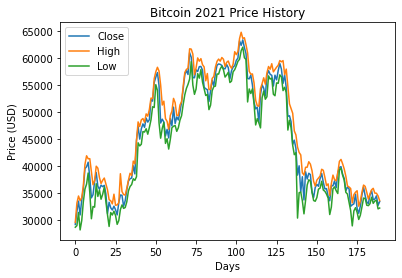

In [5]:
#Price Changes#
plt.figure()
plt.plot(BTC["Close"])
plt.plot(BTC["High"])
plt.plot(BTC["Low"])
plt.title('Bitcoin 2021 Price History')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Close','High', 'Low'], loc='upper left')

plt.show()

In [6]:
#Checks real-time vs predictions using LSTM model#
#Creating a new dataset filtering by closing price#
closedata=BTC.filter(['Close'])
newdata= closedata.values

#Training LSTM#
trainingdata=math.ceil(len(newdata) * .8)
trainingdata

152

In [7]:
#Scales data to make it easier with using LSTM Model#
scaler = MinMaxScaler(feature_range=(0,1))
datascaled= scaler.fit_transform(newdata)
datascaled

array([[0.        ],
       [0.07124436],
       [0.12666315],
       [0.05181408],
       [0.13272962],
       [0.19310123],
       [0.30294238],
       [0.31264287],
       [0.33731903],
       [0.25570013],
       [0.14433503],
       [0.16139148],
       [0.23413047],
       [0.28146064],
       [0.20705117],
       [0.19125491],
       [0.21308833],
       [0.20502901],
       [0.21203329],
       [0.16508411],
       [0.05908212],
       [0.12062599],
       [0.09029365],
       [0.07839517],
       [0.09917355],
       [0.08012426],
       [0.051902  ],
       [0.11766602],
       [0.15989684],
       [0.1579626 ],
       [0.09867534],
       [0.12918352],
       [0.18835355],
       [0.23518551],
       [0.24772874],
       [0.25186097],
       [0.31780083],
       [0.27404607],
       [0.45536604],
       [0.53039095],
       [0.46245824],
       [0.51825802],
       [0.54492703],
       [0.52608288],
       [0.57622648],
       [0.55459821],
       [0.56804994],
       [0.676

In [8]:
#Create training set#
train_data=datascaled[0:trainingdata, :]

#Splits data into x and y train#
x_train=[] 
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()


[array([0.        , 0.07124436, 0.12666315, 0.05181408, 0.13272962,
       0.19310123, 0.30294238, 0.31264287, 0.33731903, 0.25570013,
       0.14433503, 0.16139148, 0.23413047, 0.28146064, 0.20705117,
       0.19125491, 0.21308833, 0.20502901, 0.21203329, 0.16508411,
       0.05908212, 0.12062599, 0.09029365, 0.07839517, 0.09917355,
       0.08012426, 0.051902  , 0.11766602, 0.15989684, 0.1579626 ,
       0.09867534, 0.12918352, 0.18835355, 0.23518551, 0.24772874,
       0.25186097, 0.31780083, 0.27404607, 0.45536604, 0.53039095,
       0.46245824, 0.51825802, 0.54492703, 0.52608288, 0.57622648,
       0.55459821, 0.56804994, 0.67622062, 0.66819061, 0.76882949,
       0.79837055, 0.82272434, 0.7520075 , 0.549704  , 0.57033585,
       0.55506711, 0.47951468, 0.51535666, 0.46878846, 0.57396987])]
[0.5339077428052283]



In [9]:
#Convert to arrays#
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshapes data#
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train

array([[[0.        ],
        [0.07124436],
        [0.12666315],
        ...,
        [0.51535666],
        [0.46878846],
        [0.57396987]],

       [[0.07124436],
        [0.12666315],
        [0.05181408],
        ...,
        [0.46878846],
        [0.57396987],
        [0.53390774]],

       [[0.12666315],
        [0.05181408],
        [0.13272962],
        ...,
        [0.57396987],
        [0.53390774],
        [0.6357482 ]],

       ...,

       [[0.86961491],
        [0.8673583 ],
        [0.86149698],
        ...,
        [0.27011898],
        [0.17542934],
        [0.14673817]],

       [[0.8673583 ],
        [0.86149698],
        [0.84414747],
        ...,
        [0.17542934],
        [0.14673817],
        [0.20092609]],

       [[0.86149698],
        [0.84414747],
        [0.84318035],
        ...,
        [0.14673817],
        [0.20092609],
        [0.2173964 ]]])

In [11]:
#LSTM model being built to test what it should be#
lstmmodel= Sequential()
lstmmodel.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
lstmmodel.add(LSTM(50, return_sequences=False))
lstmmodel.add(Dense(25))
lstmmodel.add(Dense(1))

In [12]:
#Model Continues MSE#
lstmmodel.compile(optimizer='adam', loss= 'mean_squared_error')

In [13]:
#LSTM Model Trained#
lstmmodel.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
92/92 [==============================] - 8s 44ms/step - loss: 0.0938
Epoch 2/3
92/92 [==============================] - 3s 37ms/step - loss: 0.0316
Epoch 3/3
92/92 [==============================] - 4s 40ms/step - loss: 0.0183


In [14]:
#Testing Dataset#
testdata=datascaled[trainingdata -60:, :]

x_test= []
y_test= newdata[trainingdata:,:]
for i in range(60, len(testdata)):
    x_test.append(testdata[i-60:i,0])

In [15]:
#Convert to numpy#
x_test=np.array(x_test)
#Reshapes#
x_test=np.reshape(x_test, (38, 60,1))

In [16]:
#Prediction for Xtest#
pred= lstmmodel.predict(x_test)
pred= scaler.inverse_transform(pred)

<ipython-input-17-49734c30c769>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Predictions']= pred


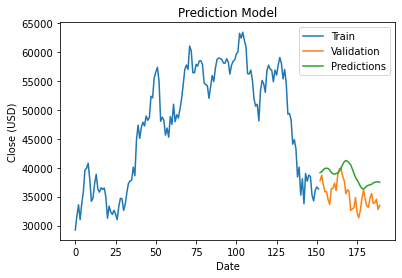

In [17]:
#Plotting Data to show actual verus predictions from the LSTM model#
train= closedata[:trainingdata]
val= closedata[trainingdata:]
val['Predictions']= pred
plt.figure()
plt.title('Prediction Model')
plt.xlabel('Date')
plt.ylabel('Close (USD)')
plt.plot(train['Close'])
plt.plot(val[['Close','Predictions']])
plt.legend(['Train', 'Validation','Predictions'])
plt.show()


In [18]:
#Shows what the predictions based off previous days#
val

,Close,Predictions
152,37739,39154.453125
153,38693,39301.636719
154,37071,39629.289062
155,35826,39869.339844
156,35897,39915.570312
157,34471,39852.937500
158,33638,39592.757812
159,36406,39166.296875
160,36410,38955.527344
161,37331,38886.593750


In [19]:
#Setup for prediction column# 
futuredays= 60
BTC['Prediction'] = BTC[['Close']].shift(-futuredays)

In [20]:
#Checks to make sure prediction column was added#
BTC

,Date,Open,High,Low,Close,Prediction
0,1/1/21,28965,29650,28754,29259,47477.0
1,1/2/21,29243,33219,29050,31690,50952.0
2,1/3/21,31714,34524,31494,33581,47924.0
3,1/4/21,33581,33649,28258,31027,49138.0
4,1/5/21,31029,34221,29991,33788,48583.0
...,...,...,...,...,...,...
185,7/5/21,35542,35945,33171,33847,NaN
186,7/6/21,33847,35058,33601,33941,NaN
187,7/7/21,33941,35040,33724,34550,NaN
188,7/8/21,34550,34550,32142,32788,NaN


In [21]:
#Creates independent data for predicting#
X= np.array(BTC[['Close']])
X= X[:-futuredays]

In [22]:
#Creates dependent variable for predicting#
y= BTC['Prediction'].values 
y=y[:-futuredays]

In [23]:
#Splits for training purposes#
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .05)

In [24]:
#Creates modelling for training#
from sklearn.linear_model import LinearRegression
LR = LinearRegression() 
LR.fit(x_train, y_train)

LinearRegression()

In [25]:
#Test confidence to see if it is good#
LR_Conf= LR.score(x_test, y_test)
LR_Conf

0.624061023610036

In [26]:
#Creating projections for the last 60 days#
x_projection = np.array(BTC[['Close']]) [-futuredays:]
x_projection

array([[56942],
       [54540],
       [49253],
       [49351],
       [48255],
       [44062],
       [44843],
       [43318],
       [38390],
       [40108],
       [35263],
       [38086],
       [33791],
       [38999],
       [37656],
       [38731],
       [38476],
       [35245],
       [34266],
       [36115],
       [36677],
       [36330],
       [37739],
       [38693],
       [37071],
       [35826],
       [35897],
       [34471],
       [33638],
       [36406],
       [36410],
       [37331],
       [36041],
       [38830],
       [39809],
       [39949],
       [38550],
       [37752],
       [35493],
       [36193],
       [35853],
       [32622],
       [32895],
       [33066],
       [34857],
       [32212],
       [31329],
       [32648],
       [34721],
       [36156],
       [34585],
       [33411],
       [33124],
       [34715],
       [35542],
       [33847],
       [33941],
       [34550],
       [32788],
       [33508]])

In [27]:
#Prints prediction for the next 60 days#
#Based off our machine learning model we can see what is expect for the next 60 days from 7/9
LR_pred= LR.predict(x_projection)
LR_pred

array([42494.91235752, 44058.58222569, 47500.34850088, 47436.55181184,
       48150.03315052, 50879.62006028, 50371.1995078 , 51363.9541077 ,
       54572.01618528, 53453.62116716, 56607.65135504, 54769.91611864,
       57565.90366393, 54175.56533194, 55049.84036648, 54350.02974688,
       54516.03133571, 56619.36911425, 57256.68501806, 56053.01075234,
       55687.15627028, 55913.04862842, 54995.80847678, 54374.76723855,
       55430.66754087, 56241.14588636, 56194.92583613, 57123.23276037,
       57665.50461723, 55863.57364508, 55860.96969859, 55261.41101892,
       56101.18376244, 54285.58207121, 53648.26616741, 53557.1280402 ,
       54467.85832562, 54987.34565068, 56457.92443178, 56002.23379576,
       56223.56924754, 58326.90702608, 58149.18767803, 58037.86896552,
       56871.95192393, 58593.81154146, 59168.63272947, 58309.98137389,
       56960.48610465, 56026.32030081, 57049.02028536, 57813.27858062,
       58000.11174139, 56964.39202438, 56426.02608726, 57529.44841305,
      

In [31]:
#Saves predictions as CSV, I find it easier to work with# 
from numpy import asarray
from numpy import savetxt
savetxt('BitcoinPred.csv', LR_pred, delimiter=',')

In [33]:
BTCPred= pd.read_csv('/Users/Brett/Desktop/BitcoinPred.csv')
BTCPred


,Date,Close
0,1/1/21,29259
1,1/2/21,31690
2,1/3/21,33581
3,1/4/21,31027
4,1/5/21,33788
...,...,...
245,9/3/21,57529
246,9/4/21,57468
247,9/5/21,57072
248,9/6/21,58219


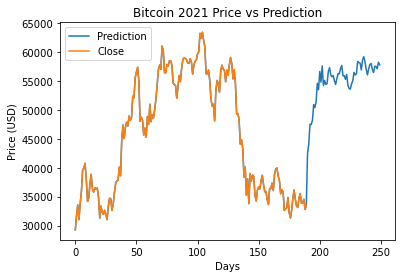

In [34]:
#This plots the prediction vs the actual close. Showing what we are predicting is going to happen# 
plt.figure()
plt.plot(BTCPred['Close'])
plt.plot(BTC["Close"])
plt.title('Bitcoin 2021 Price vs Prediction')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Prediction','Close'], loc='upper left')

plt.show()